In [1]:
experiment_path = "/home/maelic/ray_results/train_relation_net_2024-07-04_10-03-20/"

import ray
import ray.tune as tune
import os
from hyper_param_tuning import train_relation_net

print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path, trainable=train_relation_net)
result_grid = restored_tuner.get_results()

/home/maelic/miniconda3/envs/ml/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/maelic/miniconda3/envs/ml/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Loading results from /home/maelic/ray_results/train_relation_net_2024-07-03_15-43-18/...


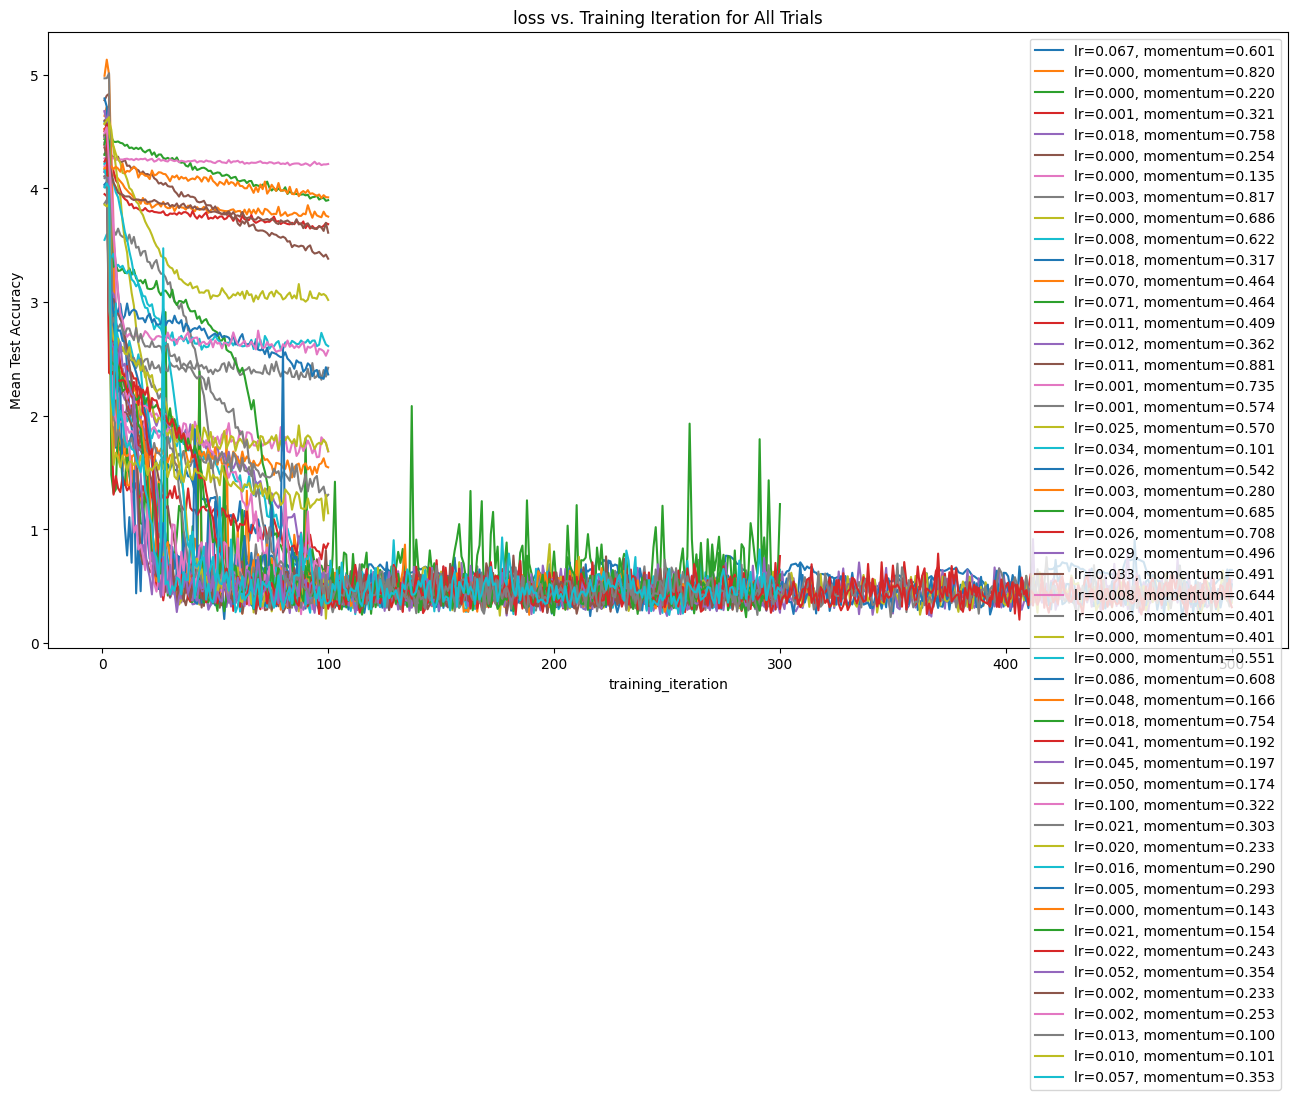

In [2]:
ax = None
for result in result_grid:
    label = f"lr={result.config['tuning_config']['lr']:.3f}, momentum={result.config['tuning_config']['momentum']:.3f}"
    if ax is None:
        # smooting values
        result.metrics_dataframe["loss"] = result.metrics_dataframe["loss"].rolling(10).mean()
        ax = result.metrics_dataframe.plot("training_iteration", "loss", label=label)
    else:
        result.metrics_dataframe.plot("training_iteration", "loss", ax=ax, label=label)
ax.set_title("loss vs. Training Iteration for All Trials")
ax.set_ylabel("Mean Test Accuracy")
# ax size
fig = ax.get_figure()
fig.set_size_inches(16, 8)

In [3]:
# get best result
best_result_df = result_grid.get_dataframe(
    filter_metric="loss", filter_mode="min"
)
# sort 
best_result_df = best_result_df.sort_values("loss")
# replace column names
# best_result_df.columns = best_result_df.columns.str.replace("config/tuning_config/", "")
# best_result_df = best_result_df[["training_iteration", "loss", "lr", "momentum"]]
# show a list of parameters used for the best results

for i, row in best_result_df.iterrows():
    for k in row.keys():
        if k == "loss":
            print(f"{k}: {row[k]}")
        if "config/tuning_config/" in k:
            # remove the prefix
            p = k.replace("config/tuning_config/", "")
            print(f"{p}: {row[k]}")
        if "config/model_config/" in k:
            # remove the prefix
            p = k.replace("config/model_config/", "")
            print(f"{p}: {row[k]}")
    break

loss: 0.20595884323120117
optimizer: SGD
lr: 0.025588655128118053
momentum: 0.707671675599117
max_epoch: 1
num_images: 4000
MODEL.ROI_RELATION_HEAD.SQUAT_MODULE.NUM_DECODER: 1
MODEL.ROI_RELATION_HEAD.SQUAT_MODULE.RHO: 0.5922383444656768
MODEL.ROI_RELATION_HEAD.SQUAT_MODULE.BETA: 0.559157095644633
MODEL.ROI_RELATION_HEAD.SQUAT_MODULE.PRE_NORM: False
